# Guidelines

- There are three questions, each in separate jupyter notebook. 
- Add your roll number and name before the file name.
- Once you finish the assignment, export each notebook as HTML and upload to LMS.
- Write all your answers in jupyter notebook markdown cells.
- See end of the file for sample graphs.

# Keyterms
- PCA : Principle Component Analysis
- POV : Proportion of Variance
- SVD : Singluar Value Decomposition

# Question 1

Our ﬁrst problem is to perform PCA on the created dataset. The purpose is to help you
understand details of PCA. Please refer to chapter 6 (Dimension Reduction) of the lecture
notes. You need to ﬁnish the following tasks:

1. Write Your Own PCA.

Read lecture notes carefully, and implement your own PCA. You need to complete the
function pca(X) in the script below. The input is the matrix X in which each row
represents a sample. The output should be $[V, D]$, where V is a matrix containing all
eigenvectors (whose eigenvalues are in a decreasing order) and D should be a column vector
containing all eigenvalues (in a descent order). You can compare your result with the one
of PCA in the scikit-learn.

2. Plot Eigenvalues and POV.

We generate a dataset X, which is a 1000 × 9 matrix. Perform PCA on
this matrix and plot all eigenvalues in a decreasing order. Assume the descent ordered
eigenvalues are $λ1, λ2, · · ·, λN $. The x-axis should be $1, 2, · · ·, N$ (the order of eigenvalues)
and y-axis should be the eigenvalues (refer to sample image below).

In [0]:
# Do not change this cell
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Do not chane this block
def create_data(x1, x2, x3):
    x4 = -4.0 * x1
    x5 = 10 * x1 + 10
    x6 = -1 * x2 / 2
    x7 = np.multiply(x2, x2)
    x8 = -1 * x3 / 10
    x9 = 2.0 * x3 + 2.0
    X = np.hstack((x1, x2, x3, x4, x5, x6, x7, x8, x9))
    return X



# Complete the following code [25 marks]

In [0]:
# Implement your own PCA. You are only allowed to use numpy.
# Look at mean, cov, eig methods of the numpy for help.

def pca(X):
    '''
    # PCA step by step
    #   1. normalize matrix X
    #   2. compute the covariance matrix of the normalized matrix X
    #   3. do the eigenvalue decomposition on the covariance matrix
    # If you do not remember Eigenvalue Decomposition, please review the linear
    # algebra
    # In this assignment, we use the ``unbiased estimator'' of covariance. You
    # can refer to this website for more information
    # http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.cov.html
    # Actually, Singular Value Decomposition (SVD) is another way to do the
    # PCA, if you are interested, you can google SVD.
    # 
    '''

    ####################################################################
    # here V is the matrix containing all the eigenvectors, D is the
    # column vector containing all the corresponding eigenvalues.
    
    #YOUR CODE HERE!
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    norm = (X - mean) # normalize matrix

    cov = np.cov(norm.T) # compute covariance

    D, V = np.linalg.eig(cov) # eigenvector decomposition
    
    return [V, D]




# Complete following code and answer the question. [25 marks]

**1. How many components (dimensions) do you think are enough to describe the data (observe the graphs).**

## Answer: ##
1 dimension already gives us ~0.95 pov, but, 2 dimensions gives us near 100% POV so 2 dimensions are enough to describe the data

1.0


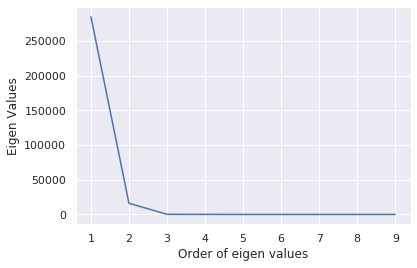

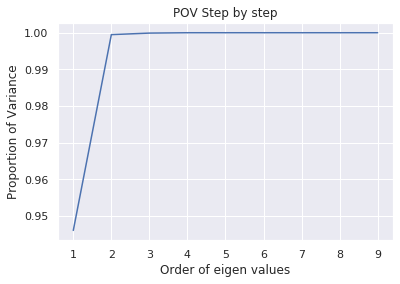

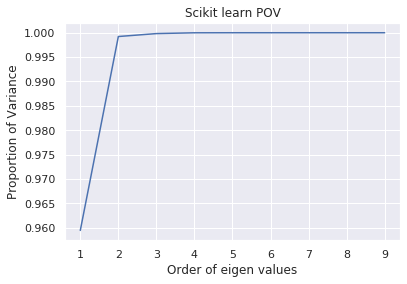

In [0]:
def main():
    N = 1000
    shape = (N, 1)
    x1 = np.random.normal(0, 1, shape) # samples from normal distribution
    x2 = np.random.exponential(10.0, shape) # samples from exponential distribution
    x3 = np.random.uniform(-100, 100, shape) # uniformly sampled data points
    X = create_data(x1, x2, x3) # creating synthetic data from all distributions above.

    ####################################################################
    #   1. perform PCA on matrix X using your PCA implementation as well as sklearn implementation.
    #   2. plot the eigenvalues against the order of eigenvalues (aka eigenvectors)
    #   3. plot POV (proportion of variance) v.s. the order of eigenvalues (aka eigenvectors). Compare this with sklearn
    #      output (by plotting).
    # YOUR CODE HERE!


    myPCA = pca(X)
    index = range(1,10)
    EigenVals = np.sort(myPCA[1])
    EigenVals = EigenVals[::-1]
    plt.plot(index, EigenVals)
    plt.xlabel('Order of eigen values')
    plt.ylabel('Eigen Values')

    POV_sum = sum(EigenVals)
    POV = EigenVals / POV_sum
    POV = np.cumsum(POV)

    plt.figure()
    plt.plot(index, POV)
    plt.xlabel('Order of eigen values')
    plt.ylabel('Proportion of Variance')
    plt.title('POV Step by step')

    Scikit_PCA = PCA()
    Scikit_PCA.fit(X.T)
    POV_scikit = Scikit_PCA.explained_variance_ratio_
    POV_scikit = np.cumsum(POV_scikit)

    plt.figure()
    plt.plot(index, POV_scikit)
    plt.xlabel('Order of eigen values')
    plt.ylabel('Proportion of Variance')
    plt.title('Scikit learn POV')

    ####################################################################


if __name__ == '__main__':
    main()